The goal of this code is to take data from the United States Census Bureau and United States Department of Transportation to see how total highway miles, Amtrak energy usage, and airline departures to the top 50 foreign countries compare to the growth of the United States population.

Import Packages and Define Functions

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def PopDataType(DataFrame):
    """PopDataType(DataFrame)--->DataFrame
    
    Ensures that a DataFrame with four columns ('Year','Month','Day','Population') has the types (str,str,str,int)
    Returns the DataFrame with these types"""
    DataFrame=DataFrame.astype({'Year':str,'Month':str,'Day':str,'Population':int})
    return DataFrame

In [3]:
def DateSplit(DataFrame):
    """DateSplit(DataFrame)-->DataFrame
    
    This function splits a column of a Pandas DataFrame that is named 'Date' and has the format 'DD-MM-YY' into three
    seperate columns titled 'Day', 'Month', and 'Year'
    
    
    """
    Date=DataFrame['Date'].str.split('-',expand=True)
    Date=Date.rename({0:'Day',1:'Month',2:'Year'},
                   axis='columns')
    DataFrame['Day']=Date['Day']
    DataFrame['Month']=Date['Month']
    DataFrame['Year']=Date['Year']
    return DataFrame

In [4]:
def ReformatMonthYear(DataFrame,FirstTwoYearDigits):
    """ReformatMonthYear(DataFrame,str)--->DataFrame
    
    This function replaces 'Jul' with 'July' in the 'Month' column of DataFrame, and it adds two digits to the beginning of
    the year to create a year with four digits in the 'Year' column of DataFrame
    
    Returns DataFrame with reformatted Month and Year
    """
    DataFrame['Month']=DataFrame['Month'].replace(to_replace='Jul',
                                                 value='July')
    DataFrame['Year']=FirstTwoYearDigits+DataFrame['Year']
    return DataFrame

In [5]:
def FilterandMelt(DataFrame,RowToMelt,FirstColumn):
    """FilterandMelt(DataFrame,str,str)--->DataFrame
    This function takes a DataFrame and returns another DataFrame that has a column for year 
    and the ColumnToMelt specified.
    Make sure that FirstColumn doesn't equal 'Year'; if it does, no 'Year' column will appear in the final DataFrame
    """
    Filter=DataFrame[FirstColumn]==RowToMelt
    NewDataFrame=DataFrame[Filter]
    ColumnNameList=list(NewDataFrame)
    del ColumnNameList[0]
    NewDataFrame=NewDataFrame.melt(id_vars=[FirstColumn],
                                  value_vars=ColumnNameList,
                                  var_name='Year',
                                  value_name=RowToMelt)
    
    
    NewDataFrame.drop(labels=NewDataFrame.columns[0],
                      axis=1,
                     inplace=True)
    
    return NewDataFrame

Read In Data

In [6]:
VehicleMilesData=pd.read_csv('USVehicleMiles.csv')
VehicleMilesData=VehicleMilesData.rename({'Year':'Mode'},
                                        axis='columns')
#read in vehicle miles data and rename first column

In [7]:
AmtrakFuelConsumption=pd.read_csv('AmtrakFuelConsumption.csv')
#read in amtrak fuel consumption data

In [8]:
ForeignDeparturesData=pd.read_excel('https://www.bts.gov/sites/bts.dot.gov/files/table_01_46_072920.xlsx', 
                                   header=1,
                                   nrows=10)
#read in air passenger departures to selected foreign countries data

In [9]:
PopData1=pd.read_csv('PopData1.csv',
                    usecols=[0,1,2,3])
#read in population data for 2010-2020
JulyFilter= PopData1['Month']=='July'
PopData1Final=PopData1[JulyFilter]
#filter for 1 value for july 1 each year
PopData1Final=PopData1Final.rename({'Resident Population':'Population'},
                    axis='columns')
PopData1Final=PopDataType(PopData1Final) #assigns correct data types

In [10]:
PopData2=pd.read_csv('PopData2.csv',
                     header=6,
                     nrows=100,
                    usecols=[0,1])
#read in population data for 1900-1999
PopData2=DateSplit(PopData2)
PopData2=ReformatMonthYear(PopData2,'19')
#splits date and reformats 'Month' and 'Year' columns
PopData2=PopData2.rename({'National Population':'Population'},
               axis='columns')
PopData2Final=PopData2.reindex(columns=['Year','Month','Day','Population']) #reorders columns
PopData2Final['Population']=PopData2Final['Population'].str.replace(',','') #gets rid of commas
PopData2Final=PopDataType(PopData2Final) #assigns correct data types

In [11]:
PopData3=pd.read_csv('PopData3.csv',
                     usecols=[0,1,2,3,4,5,6,7,8,9,10])
#read in population data for 2000-2009
PopData3=PopData3.melt(id_vars='Sex',
             value_vars=['1-Jul-00','1-Jul-01','1-Jul-02','1-Jul-03','1-Jul-04','1-Jul-05','1-Jul-06','1-Jul-07',
                         '1-Jul-08','1-Jul-09'],
             var_name='Date',
             value_name='Population')
SexFilter=PopData3['Sex']=='BOTH'
PopData3=PopData3[SexFilter] #filters for population to include both sexes
PopData3=DateSplit(PopData3)
PopData3Final=PopData3.reindex(columns=['Year','Month','Day','Population']) #reorders columns
PopData3Final=ReformatMonthYear(PopData3Final,'20') 
PopData3Final=PopDataType(PopData3Final) #assigns correct data types

Reformat Other Datasets

In [12]:
TotalHighwayMiles=FilterandMelt(VehicleMilesData,'Highway, total','Mode')
TotalHighwayMiles=TotalHighwayMiles.rename({'Highway, total':'Total Highway Miles Traveled (in millions)'},
                                          axis='columns')
TotalHighwayMiles['Total Highway Miles Traveled (in millions)']=TotalHighwayMiles['Total Highway Miles Traveled (in millions)'].str.replace(',','') #removes commas
TotalHighwayMiles=TotalHighwayMiles.astype({'Year':str,'Total Highway Miles Traveled (in millions)':int}) #assigns correct data types

In [13]:
AmtrakEnergyConsumption=FilterandMelt(AmtrakFuelConsumption,'Electric energy consumption (millions of kWhs)','Unnamed: 0')
AmtrakEnergyConsumption=AmtrakEnergyConsumption.astype({'Year':str,'Electric energy consumption (millions of kWhs)':int}) #assigns correct data types
AmtrakDieselConsumption=FilterandMelt(AmtrakFuelConsumption,'Diesel consumption (millions of gallons)','Unnamed: 0')
AmtrakDieselConsumption=AmtrakDieselConsumption.astype({'Year':str,'Diesel consumption (millions of gallons)':int}) #assigns correct data types

In [14]:
ForeignAirlineDepartures=FilterandMelt(ForeignDeparturesData,'TOTAL departing passengers','Unnamed: 0')
ForeignAirlineDepartures=ForeignAirlineDepartures.rename({'TOTAL departing passengers':'Total Airline Departures to Foreign Countries'},
                                                  axis='columns')
ForeignAirlineDepartures=ForeignAirlineDepartures.astype({'Year':str,'Total Airline Departures to Foreign Countries':float}) #assigns correct data types

Combine Complete Data and Reorder

In [15]:
def FinalMerge(DataFrameToAdd,FinalData):
    """FinalMerge(DataFrame,DataFrame)-->DataFrame
    This function takes the DataFrameToAdd input and performs an Excel-type VLOOKUP to match values to a year in the
    FinalData DataFrame
    """
    FinalData=FinalData.merge(right=DataFrameToAdd,
                              on='Year',
                              how='left')
    return FinalData

In [16]:
PopulationData=PopData1Final
PopulationData=PopulationData.append(PopData2Final)
PopulationData=PopulationData.append(PopData3Final)
PopulationData=PopulationData.sort_values(by='Year',
                          axis=0)
FinalData=PopulationData
FinalData=FinalMerge(TotalHighwayMiles,FinalData)
FinalData=FinalMerge(AmtrakEnergyConsumption,FinalData)
FinalData=FinalMerge(AmtrakDieselConsumption,FinalData)
FinalData=FinalMerge(ForeignAirlineDepartures,FinalData)
#combines all data frames into a FinalData data frame

Make Final Adjustments for Plotting

In [17]:
FinalData=FinalData.astype({'Year':int})
FinalData['Total Highway Miles Traveled (in millions)']=FinalData['Total Highway Miles Traveled (in millions)'] * 100
FinalData=FinalData.rename({'Total Highway Miles Traveled (in millions)':
                           'Total Highway Miles Traveled (in tens of thousands)'},
                          axis='columns')
FinalData['Electric energy consumption (millions of kWhs)']=FinalData['Electric energy consumption (millions of kWhs)'] * 1000000
FinalData=FinalData.rename({'Electric energy consumption (millions of kWhs)':'Electric energy consumption (kWhs)'},
                          axis='columns')
FinalData['Diesel consumption (millions of gallons)']=FinalData['Diesel consumption (millions of gallons)']*1000000*3
FinalData=FinalData.rename({'Diesel consumption (millions of gallons)':'Diesel consumption (gallons*3)'},
                          axis='columns')
FinalData['Total Airline Departures to Foreign Countries']=FinalData['Total Airline Departures to Foreign Countries']*10000
FinalData=FinalData.rename({'Total Airline Departures to Foreign Countries':'Airline Departures to Top 50 Foriegn Countries*10000'},
                          axis='columns')

Plotting

In [18]:
def PlotFunction(ColumnToCompareToPopulation):
    """PlotFunction(str)
    This function takes a column from the FinalData DataFrame and plots it against the 'Year' column, along with the
    'Population' column being compared to the 'Year' column
    """
    fig,ax=plt.subplots()
    ax.plot(FinalData['Year'],FinalData['Population'],
           label='Population')
    ax.plot(FinalData['Year'],FinalData[ColumnToCompareToPopulation].fillna(method='ffill'),
           label=ColumnToCompareToPopulation)
    ax.legend(loc='best')
    plt.show()

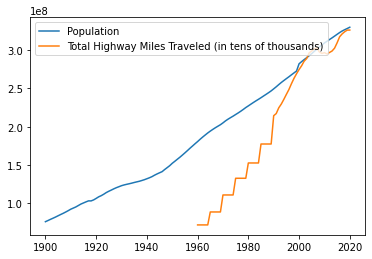

In [19]:
PlotFunction('Total Highway Miles Traveled (in tens of thousands)')

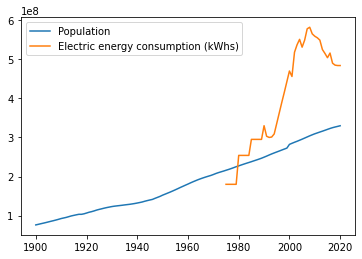

In [20]:
PlotFunction('Electric energy consumption (kWhs)')

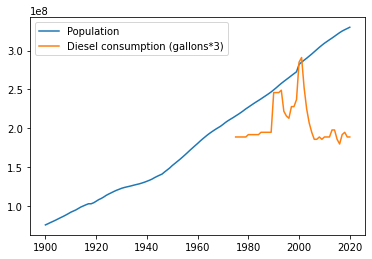

In [21]:
PlotFunction('Diesel consumption (gallons*3)')

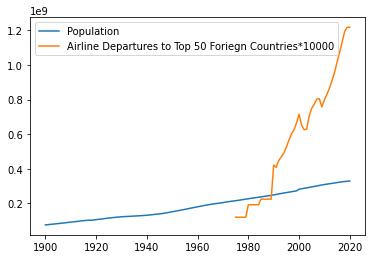

In [22]:
PlotFunction('Airline Departures to Top 50 Foriegn Countries*10000')

Submission Code

In [23]:
%%bash
git pull
git add final
git commit -a -m "Submitting the final"
git push

Updating efb3f9d..5c2da70
Fast-forward
 week08/feedback.md | 1 +
 1 file changed, 1 insertion(+)
 create mode 100644 week08/feedback.md
[main 67a9a42] Submitting the final
 1 file changed, 21 insertions(+), 2 deletions(-)


From github.com:etl11/hds5210-2021
   efb3f9d..5c2da70  main       -> origin/main
fatal: pathspec 'final' did not match any files
To github.com:etl11/hds5210-2021.git
   5c2da70..67a9a42  main -> main
